# 深度学习实验二: 使用AutoGrad

In [1]:
name = '王浩南'#填写你的姓名
sid = 'E02014154'#填写你的学号

print('姓名:%s, 学号:%s'%(name, sid))

姓名:王浩南, 学号:E02014154


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. 使用张量的自动求导计算一元函数的导数

请按以下要求，使用张量编写代码，计算sigmoid函数的导数，并绘制曲线图。

In [3]:
#在下面定义一个用于计算sigmoid的函数
def sigmoid(z):
    a = 1.0/(1+torch.exp(-z))      #请用一行代码实现
    return a

In [4]:
#测试sigmoid函数:
print(sigmoid(torch.tensor([-1,0,1],dtype = torch.float32)))

tensor([0.2689, 0.5000, 0.7311])


In [5]:
#在[-5,5]区间等间隔取100个数，得到一维张量x

x = torch.linspace(-5,5,100,dtype = torch.float32)#请用一行代码实现

print(x.shape)

torch.Size([100])


In [6]:
x.requires_grad

False

In [7]:
#在下面设置张量x的requires_grad属性为True
x.requires_grad = True


In [8]:
x.grad is None

True

In [9]:
x.grad_fn is None

True

In [10]:
y = sigmoid(x)

In [11]:
y.grad_fn

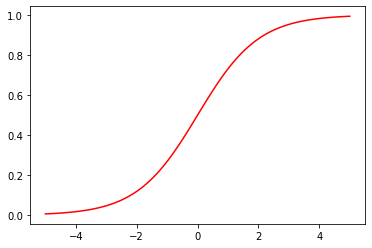

In [12]:
plt.plot(x.detach().numpy(),y.detach().numpy(),'r-')
plt.show()

In [13]:
#在下面编写代码，计算y的元素和 
z = torch.sum(y)  #请用一行代码实现

In [14]:
#使用Autograd，反向传播，得到x的梯度
#请用一行代码实现,提示:Tensor.backward()
y.backward(torch.ones(y.shape),retain_graph=True)


In [15]:
x.grad

tensor([0.0066, 0.0073, 0.0081, 0.0090, 0.0099, 0.0109, 0.0121, 0.0133, 0.0147,
        0.0162, 0.0178, 0.0197, 0.0217, 0.0238, 0.0262, 0.0289, 0.0317, 0.0349,
        0.0383, 0.0420, 0.0460, 0.0504, 0.0551, 0.0602, 0.0657, 0.0716, 0.0779,
        0.0847, 0.0918, 0.0994, 0.1074, 0.1158, 0.1246, 0.1336, 0.1430, 0.1525,
        0.1622, 0.1719, 0.1816, 0.1910, 0.2003, 0.2090, 0.2173, 0.2249, 0.2317,
        0.2375, 0.2423, 0.2461, 0.2486, 0.2498, 0.2498, 0.2486, 0.2461, 0.2423,
        0.2375, 0.2317, 0.2249, 0.2173, 0.2090, 0.2003, 0.1910, 0.1816, 0.1719,
        0.1622, 0.1525, 0.1430, 0.1336, 0.1246, 0.1158, 0.1074, 0.0994, 0.0918,
        0.0847, 0.0779, 0.0716, 0.0657, 0.0602, 0.0551, 0.0504, 0.0460, 0.0420,
        0.0383, 0.0349, 0.0317, 0.0289, 0.0262, 0.0238, 0.0217, 0.0197, 0.0178,
        0.0162, 0.0147, 0.0133, 0.0121, 0.0109, 0.0099, 0.0090, 0.0081, 0.0073,
        0.0066])

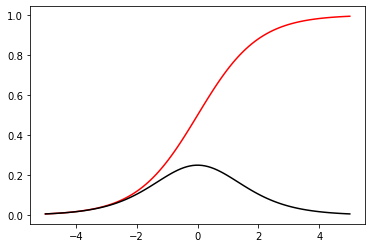

In [16]:
plt.plot(x.detach(), y.detach(),'r-')
plt.plot(x.detach(), x.grad.detach(),'k-')
plt.show()

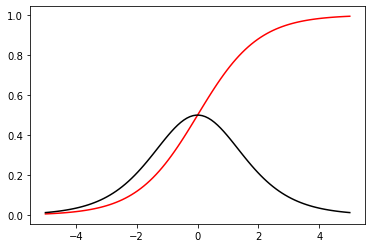

In [17]:
#在下面尝试第二次执行反向传播，看看结果是什么
y.backward(torch.ones(y.shape),retain_graph=True)
x.grad
plt.plot(x.detach(), y.detach(),'r-')
plt.plot(x.detach(), x.grad.detach(),'k-')
plt.show()

# 2. 使用torch.optim训练线性分类器

编写一个softmax分类器模型，并用torch.optim训练

下面的代码生成一个一组随机2维样本，包含了三个类别，每个类别有100个样本

In [18]:
x0 = torch.randn((2,100))*0.5 + torch.tensor([[0.5],[0.5]])
x1 = torch.randn_like(x0)*0.5 - 1
x2 = torch.randn_like(x0)*0.5 + torch.tensor([[-1.5],[1.5]])

In [19]:
x = torch.hstack((x0,x1,x2))
y = torch.hstack((torch.zeros(1,100), torch.zeros(1,100)+1, torch.zeros(1,100)+2)).squeeze()

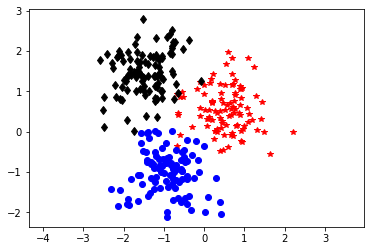

In [20]:
plt.plot(x[0,y==0],x[1,y==0],'r*')
plt.plot(x[0,y==1],x[1,y==1],'bo')
plt.plot(x[0,y==2],x[1,y==2],'kd')
plt.axis('tight')
plt.axis('equal')
plt.show()

In [21]:
#定义Softmax函数
def softmax(z):
    ###假设z是一个d行n列的张量，每一列表示一个样本
    #第一步，对每一列减去该列的最大值,提示:Tensor.max(...).values
    z = z - torch.max(z)   #请用一行代码实现
    #第二步，计算指数变换
    a =  torch.exp(z)    #请用一行代码实现
    #第三步，归一化每一列为一个概率分布
    a = a/torch.sum(a)   #请用一行代码实现
    return a

In [22]:
#测试softmax函数
dummy = torch.rand((3,10),dtype = torch.float32)
softmax(dummy)

tensor([[0.0226, 0.0344, 0.0229, 0.0203, 0.0409, 0.0268, 0.0385, 0.0419, 0.0432,
         0.0495],
        [0.0247, 0.0382, 0.0514, 0.0228, 0.0524, 0.0209, 0.0391, 0.0229, 0.0337,
         0.0469],
        [0.0384, 0.0414, 0.0235, 0.0470, 0.0245, 0.0259, 0.0209, 0.0335, 0.0215,
         0.0294]])

In [23]:
import torch.optim as optim

#定义Softmax分类器模型,用一个类表示
class SoftmaxClassifier:
    def __init__(self, in_features, out_features):#编写构造函数，记录输入特征和输出特征的维度，并初始化参数
        self.in_features = in_features
        self.out_features = out_features
        self.__initialize__()
        
    def __initialize__(self):#编写参数初始化函数，初始化权重矩阵和偏置向量
        self.W = torch.zeros((self.out_features, self.in_features), requires_grad = True)
        self.b = torch.zeros((self.out_features, 1), requires_grad = True)

    def predict(self, X):#编写预测函数，调用前面定义的softmax函数
        z = self.W @ X + self.b#请用一行代码实现
        a = softmax(z)#请用一行代码实现
        return a
    
    def fit(self, X, Y, lr = 0.1):#编写训练函数
        #第一步，初始化参数
        #请用一行代码实现
        self.__initialize__()
        
        #将Label Y转换为one-hot vector Y1
        Y1 = torch.zeros((self.out_features,X.size(1)))
        Y1[Y,torch.arange(X.size(1))] = 1

        l0 = 0
        epsilon = 1e-6
        iter = 0
        
        #第二步，定义优化器为SGD
        #请用一行代码实现
        opt = optim.SGD(params=[self.W, self.b], lr  = lr)
        
        while True:
            #1. 将参数的梯度置为0，提示zero_grad(),请用一行代码实现
            opt.zero_grad()
    
            #2. FP:对训练样本做出预测
            rho = self.predict(X) #3*n的张量 #请用一行代码实现
            
            #3.计算softmax loss
            l = (-torch.log(rho[Y1==1]).sum() - torch.log(1-rho[Y1==0]).sum()) / X.size(1) #请用一行代码实现#请用一行代码实现
            
            
            l1 = l.detach().item()
            
            print('iter = %d, loss = %f\n'%(iter,l1))
            iter = iter + 1
            
            if abs(l1-l0)<epsilon:
                break
            l0 = l1
            
            #4.BP:更新梯度,请用一行代码实现
            l.backward()
            
            #5. GD: 更新权重,请用一行代码实现
            opt.step()

In [24]:
#测试SoftmaxClassifier
cls = SoftmaxClassifier(2,3)
cls.predict(x[:,:10])

tensor([[0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
         0.0333],
        [0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
         0.0333],
        [0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
         0.0333]], grad_fn=<DivBackward0>)

In [25]:
#训练模型

cls = SoftmaxClassifier(2,3)
y = y.to(torch.int64)
cls.fit(x,y)


iter = 0, loss = 6.804618

iter = 1, loss = 6.748144

iter = 2, loss = 6.697031

iter = 3, loss = 6.650793

iter = 4, loss = 6.608959

iter = 5, loss = 6.571080

iter = 6, loss = 6.536738

iter = 7, loss = 6.505547

iter = 8, loss = 6.477158

iter = 9, loss = 6.451256

iter = 10, loss = 6.427565

iter = 11, loss = 6.405840

iter = 12, loss = 6.385866

iter = 13, loss = 6.367457

iter = 14, loss = 6.350451

iter = 15, loss = 6.334704

iter = 16, loss = 6.320095

iter = 17, loss = 6.306514

iter = 18, loss = 6.293867

iter = 19, loss = 6.282069

iter = 20, loss = 6.271048

iter = 21, loss = 6.260736

iter = 22, loss = 6.251076

iter = 23, loss = 6.242015

iter = 24, loss = 6.233506

iter = 25, loss = 6.225507

iter = 26, loss = 6.217979

iter = 27, loss = 6.210889

iter = 28, loss = 6.204203

iter = 29, loss = 6.197895

iter = 30, loss = 6.191937

iter = 31, loss = 6.186306

iter = 32, loss = 6.180982

iter = 33, loss = 6.175941

iter = 34, loss = 6.171169

iter = 35, loss = 6.166647

it

In [26]:
#评估训练结果
#应该达到95%以上准确率
with torch.no_grad():
    rho = cls.predict(x)
    yhat = rho.argmax(dim = 0)
    acc = (yhat==y).to(torch.float32).mean().item()

    print('accuracy = ',acc)

accuracy =  0.9733333587646484


# 3. （选做）用上面定义的softmax对MNIST手写体分类

In [27]:
from torchvision import datasets,transforms
import torch
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt

data_path = '../data/'
mnist_train = datasets.MNIST(data_path,download=True,train = True,transform = transforms.ToTensor())
mnist_test =  datasets.MNIST(data_path,download=True,train = False,transform = transforms.ToTensor())

In [28]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 32, shuffle = True)
#MLP
mnist_mlp = nn.Sequential(nn.Linear(784,64),
                         nn.Sigmoid(),
                         nn.Linear(64,10),
                         nn.Softmax(dim = 1))

optimizer = optim.SGD(mnist_mlp.parameters(), lr = 0.01)

loss_fn = nn.CrossEntropyLoss()

epochs = 100
mnist_mlp.train()
for epoch in range(epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        prob = mnist_mlp(imgs.view(batch_size,-1))
        loss = loss_fn(prob,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('Epoch:%d, Loss:%f'%(epoch,loss.detach().numpy()))

Epoch:0, Loss:2.297641
Epoch:1, Loss:2.290264
Epoch:2, Loss:2.278190
Epoch:3, Loss:2.198924
Epoch:4, Loss:2.166142
Epoch:5, Loss:2.202037
Epoch:6, Loss:2.060238
Epoch:7, Loss:1.910790
Epoch:8, Loss:2.025688
Epoch:9, Loss:1.886623
Epoch:10, Loss:2.037227
Epoch:11, Loss:1.979294
Epoch:12, Loss:1.767898
Epoch:13, Loss:1.778816
Epoch:14, Loss:1.785454
Epoch:15, Loss:1.837290
Epoch:16, Loss:1.769021
Epoch:17, Loss:1.892733
Epoch:18, Loss:2.031717
Epoch:19, Loss:1.767882
Epoch:20, Loss:1.886630
Epoch:21, Loss:1.792235
Epoch:22, Loss:1.677574
Epoch:23, Loss:1.678019
Epoch:24, Loss:1.771365
Epoch:25, Loss:1.772832
Epoch:26, Loss:1.696870
Epoch:27, Loss:1.730129
Epoch:28, Loss:1.923300
Epoch:29, Loss:1.826175
Epoch:30, Loss:1.789160
Epoch:31, Loss:1.817061
Epoch:32, Loss:1.869566
Epoch:33, Loss:1.756097
Epoch:34, Loss:1.750423
Epoch:35, Loss:1.770721
Epoch:36, Loss:1.602296
Epoch:37, Loss:1.764263
Epoch:38, Loss:1.798012
Epoch:39, Loss:1.802408
Epoch:40, Loss:1.663638
Epoch:41, Loss:1.625085
Ep